# K√ºt√ºphanelerin Import Edilmesi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from termcolor import colored
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

# Verisetinin Y√ºklenmesi

In [ ]:
df = pd.read_csv('Uyku_verileri.csv')
df.head()

Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200    No disorder  
1         125/80          75        10000    No disorder  
2         125/80          75        10000    No disorder  
3         140/90          85         3000    Sleep Apnea  
4         140/90          85         3000    Sleep Apnea



*   Veriseti Kaggle'dan alƒ±nmƒ±≈ütƒ±r.
*   Toplam 374 satƒ±r ve 13 s√ºtundan olu≈ümaktadƒ±r.
*   Tahmin yaptƒ±ƒüƒ±mƒ±z s√ºtun "Sleep Disorder" .





In [ ]:
df.shape

(374, 13)

# Veriseti Hakkƒ±nda Bilgiler

**Ki≈üi Kimliƒüi** (Person ID): Her birey i√ßin tanƒ±mlayƒ±cƒ± bir kimlik numarasƒ±.

**Cinsiyet** (Gender): Ki≈üinin cinsiyeti (Erkek/Kadƒ±n).

**Ya≈ü** (Age): Ki≈üinin ya≈üƒ± (yƒ±l olarak).

**Meslek** (Occupation): Ki≈üinin mesleƒüi ya da yaptƒ±ƒüƒ± i≈ü.

**Uyku S√ºresi** (Saat) (Sleep Duration): Ki≈üinin g√ºnde ka√ß saat uyuduƒüu.

**Uyku Kalitesi**  (1-10 arasƒ± √∂l√ßek) (Quality of Sleep): Uyku kalitesine dair 1 ile 10 arasƒ±nda √∂znel bir deƒüerlendirme.

**Fiziksel Aktivite S√ºresi** (Dakika/g√ºn) (Physical Activity Level): Ki≈üinin g√ºnl√ºk olarak fiziksel aktiviteye ayƒ±rdƒ±ƒüƒ± dakika sayƒ±sƒ±.

**Stres Seviyesi** (1-10 arasƒ± √∂l√ßek) (Stress Level): Ki≈üinin ya≈üadƒ±ƒüƒ± stres d√ºzeyine dair 1 ile 10 arasƒ±nda √∂znel bir deƒüerlendirme.

**V√ºcut Kitle ƒ∞ndeksi Kategorisi** (BMI Category): Ki≈üinin V√ºcut Kitle ƒ∞ndeksi (VKƒ∞) kategorisi (√∂rneƒüin: Zayƒ±f, Normal, Kilolu, Obez).

**Tansiyon** (sistolik/diyastolik) (Blood Pressure): Ki≈üinin tansiyonu, b√ºy√ºk tansiyon / k√º√ß√ºk tansiyon ≈üeklinde ifade edilir.

**Nabƒ±z** (bpm) (Heart Rate): Ki≈üinin dakikadaki istirahat halindeki kalp atƒ±≈ü sayƒ±sƒ± (bpm: beats per minute).

**G√ºnl√ºk Adƒ±m Sayƒ±sƒ±** (Daily Steps): Ki≈üinin bir g√ºnde attƒ±ƒüƒ± adƒ±m sayƒ±sƒ±.

**Uyku Bozukluƒüu** (Sleep Disorder): Ki≈üide uyku bozukluƒüu olup olmadƒ±ƒüƒ± ( Hastalƒ±k Yok, ƒ∞nsomnia, Uyku Apnesi).

# Ke≈üifsel Veri Analizi (Eda) - Exploratory Data Analysis

In [ ]:
column_names = df.columns.tolist()
print(column_names)

['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']




*   Verisetindeki t√ºm s√ºtunlar




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB




*  5 s√ºtun object deƒüerlerden olu≈üuyor. Kalan s√ºtunlar numerik deƒüerlerden olu≈ümaktadƒ±r. Veri √∂n i≈üleme adƒ±mƒ±nda object veriler sayƒ±sal verilere d√∂n√º≈üt√ºr√ºlm√º≈üt√ºr.




In [ ]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64



*   Bo≈ü deƒüer yoktur.




In [ ]:
df.describe()

Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%                  45.000000      4.000000   68.000000   5600.000000  
50%                  60.000000      5.000000   70.000000   7000.000000  
75%                  75.000000      7.000000   72.000000   8000.000000  
max                  90.000000      8.000000   86.000000  10000.000000

In [ ]:
deger_sayisi = (df.nunique())
print(deger_sayisi)

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
dtype: int64




*   Her s√ºtundaki e≈üsiz (unique) deƒüerlerin sayƒ±sƒ±nƒ± hesaplar.




In [ ]:
classes=df['Sleep Disorder'].unique()
print('Sƒ±nƒ±flar :',classes)

Sƒ±nƒ±flar : ['No disorder' 'Sleep Apnea' 'Insomnia']




*  Uyku bozukluƒüu sƒ±nƒ±flarƒ±nƒ± g√∂sterir.




In [ ]:
df['Sleep Disorder'].value_counts()

Sleep Disorder
No disorder    219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64



*   Sƒ±nƒ±f dengesizliƒüi olduƒüunu g√∂rebiliyoruz.
*   "No disorder" sƒ±nƒ±fƒ± 219 √∂rnekle baskƒ±n durumda.
*   "Sleep Apnea" ve "Insomnia" sƒ±nƒ±flarƒ± ise 77 ve 78 √∂rnekle azƒ±nlƒ±kta.






In [ ]:
import plotly.express as px

fig = px.histogram(
    df,
    x='Sleep Disorder',
    barmode="group",
    color='Sleep Disorder',
    color_discrete_sequence=['white', '#4A235A', '#C39BD3'],
    text_auto=True
)

fig.update_layout(
    title={
        'text': '<b>Ki≈üilerin Uyku Bozukluƒüu Daƒüƒ±lƒ±mƒ±</b>',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 25}
    },
    xaxis_title='Uyku Bozukluƒüu',
    yaxis_title='Ki≈üi Sayƒ±sƒ±',
    paper_bgcolor='#EBDEF0',
    plot_bgcolor='#EBDEF0',
    showlegend=True
)

fig.update_yaxes(showgrid=False)
fig.show()


# Veri √ñn ƒ∞≈üleme (Data Processing)

In [ ]:
df.drop(['Person ID'], axis=1, inplace=True)



*  ‚úÖ Person ID s√ºtunu verisetinden √ßƒ±karƒ±lƒ±r.




In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['BMI Category'] = label_encoder.fit_transform(df['BMI Category'])
df['Sleep Disorder'] = label_encoder.fit_transform(df['Sleep Disorder'])



*  ‚úÖ Her bir kategorik s√ºtun, LabelEncoder kullanƒ±larak 0, 1, 2 gibi sayƒ±sal deƒüerlere d√∂n√º≈üt√ºr√ºl√ºyor.

*  Insomnia ‚Üí 0
*  None ‚Üí 1
*  Sleep Apnea ‚Üí 2









In [ ]:
df = pd.concat([df, df['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)
df = df.rename(columns={0: 'BloodPressure_Upper_Value', 1: 'BloodPressure_Lower_Value'})


Neden Blood Pressure s√ºtununda Label Encoding uygulamadƒ±k ?


*   LabelEncoder, kategorik (nitel) verileri sayƒ±lara d√∂n√º≈üt√ºrmek i√ßin kullanƒ±lƒ±r. √ñrneƒüin "Male", "Female" gibi sƒ±nƒ±flarƒ± 0 ve 1 gibi deƒüerlere √ßevirir. Ama "120/80", "140/90" gibi sayƒ±sal oranlarƒ± 0, 1, 2 gibi keyfi sayƒ±lara d√∂n√º≈üt√ºrmek, verideki anlamƒ± bozar. Bu deƒüerler bir sƒ±ralama ya da kategori deƒüil, doƒürudan sayƒ±sal √∂l√ß√ºmler.


*   Aslƒ±nda burada **Feature Engineering** (√ñzellik M√ºhendisliƒüi) yapmƒ±≈ü olduk.








*   *  ‚úÖ Verileri int tipine d√∂n√º≈üt√ºrd√ºk.




In [ ]:
df['BloodPressure_Upper_Value'] = df['BloodPressure_Upper_Value'].astype(int)
df['BloodPressure_Lower_Value'] = df['BloodPressure_Lower_Value'].astype(int)



*   ‚úÖ Tip d√∂n√º≈ü√ºm√ºn√ºn kontrol√ºn√º yaptƒ±k.



In [ ]:
print(df['BloodPressure_Upper_Value'].dtype)
print(df['BloodPressure_Lower_Value'].dtype)


int64
int64


In [ ]:
df.head()

Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
0       1   27           9             6.1                 6   
1       1   28           1             6.2                 6   
2       1   28           1             6.2                 6   
3       1   28           6             5.9                 4   
4       1   28           6             5.9                 4   

   Physical Activity Level  Stress Level  BMI Category  Heart Rate  \
0                       42             6             3          77   
1                       60             8             0          75   
2                       60             8             0          75   
3                       30             8             2          85   
4                       30             8             2          85   

   Daily Steps  Sleep Disorder  BloodPressure_Upper_Value  \
0         4200               1                        126   
1        10000               1                        125   
2        10000               1                        125   
3         3000               2                        140   
4         3000               2                        140   

   BloodPressure_Lower_Value  
0                         83  
1                         80  
2                         80  
3                         90  
4                         90

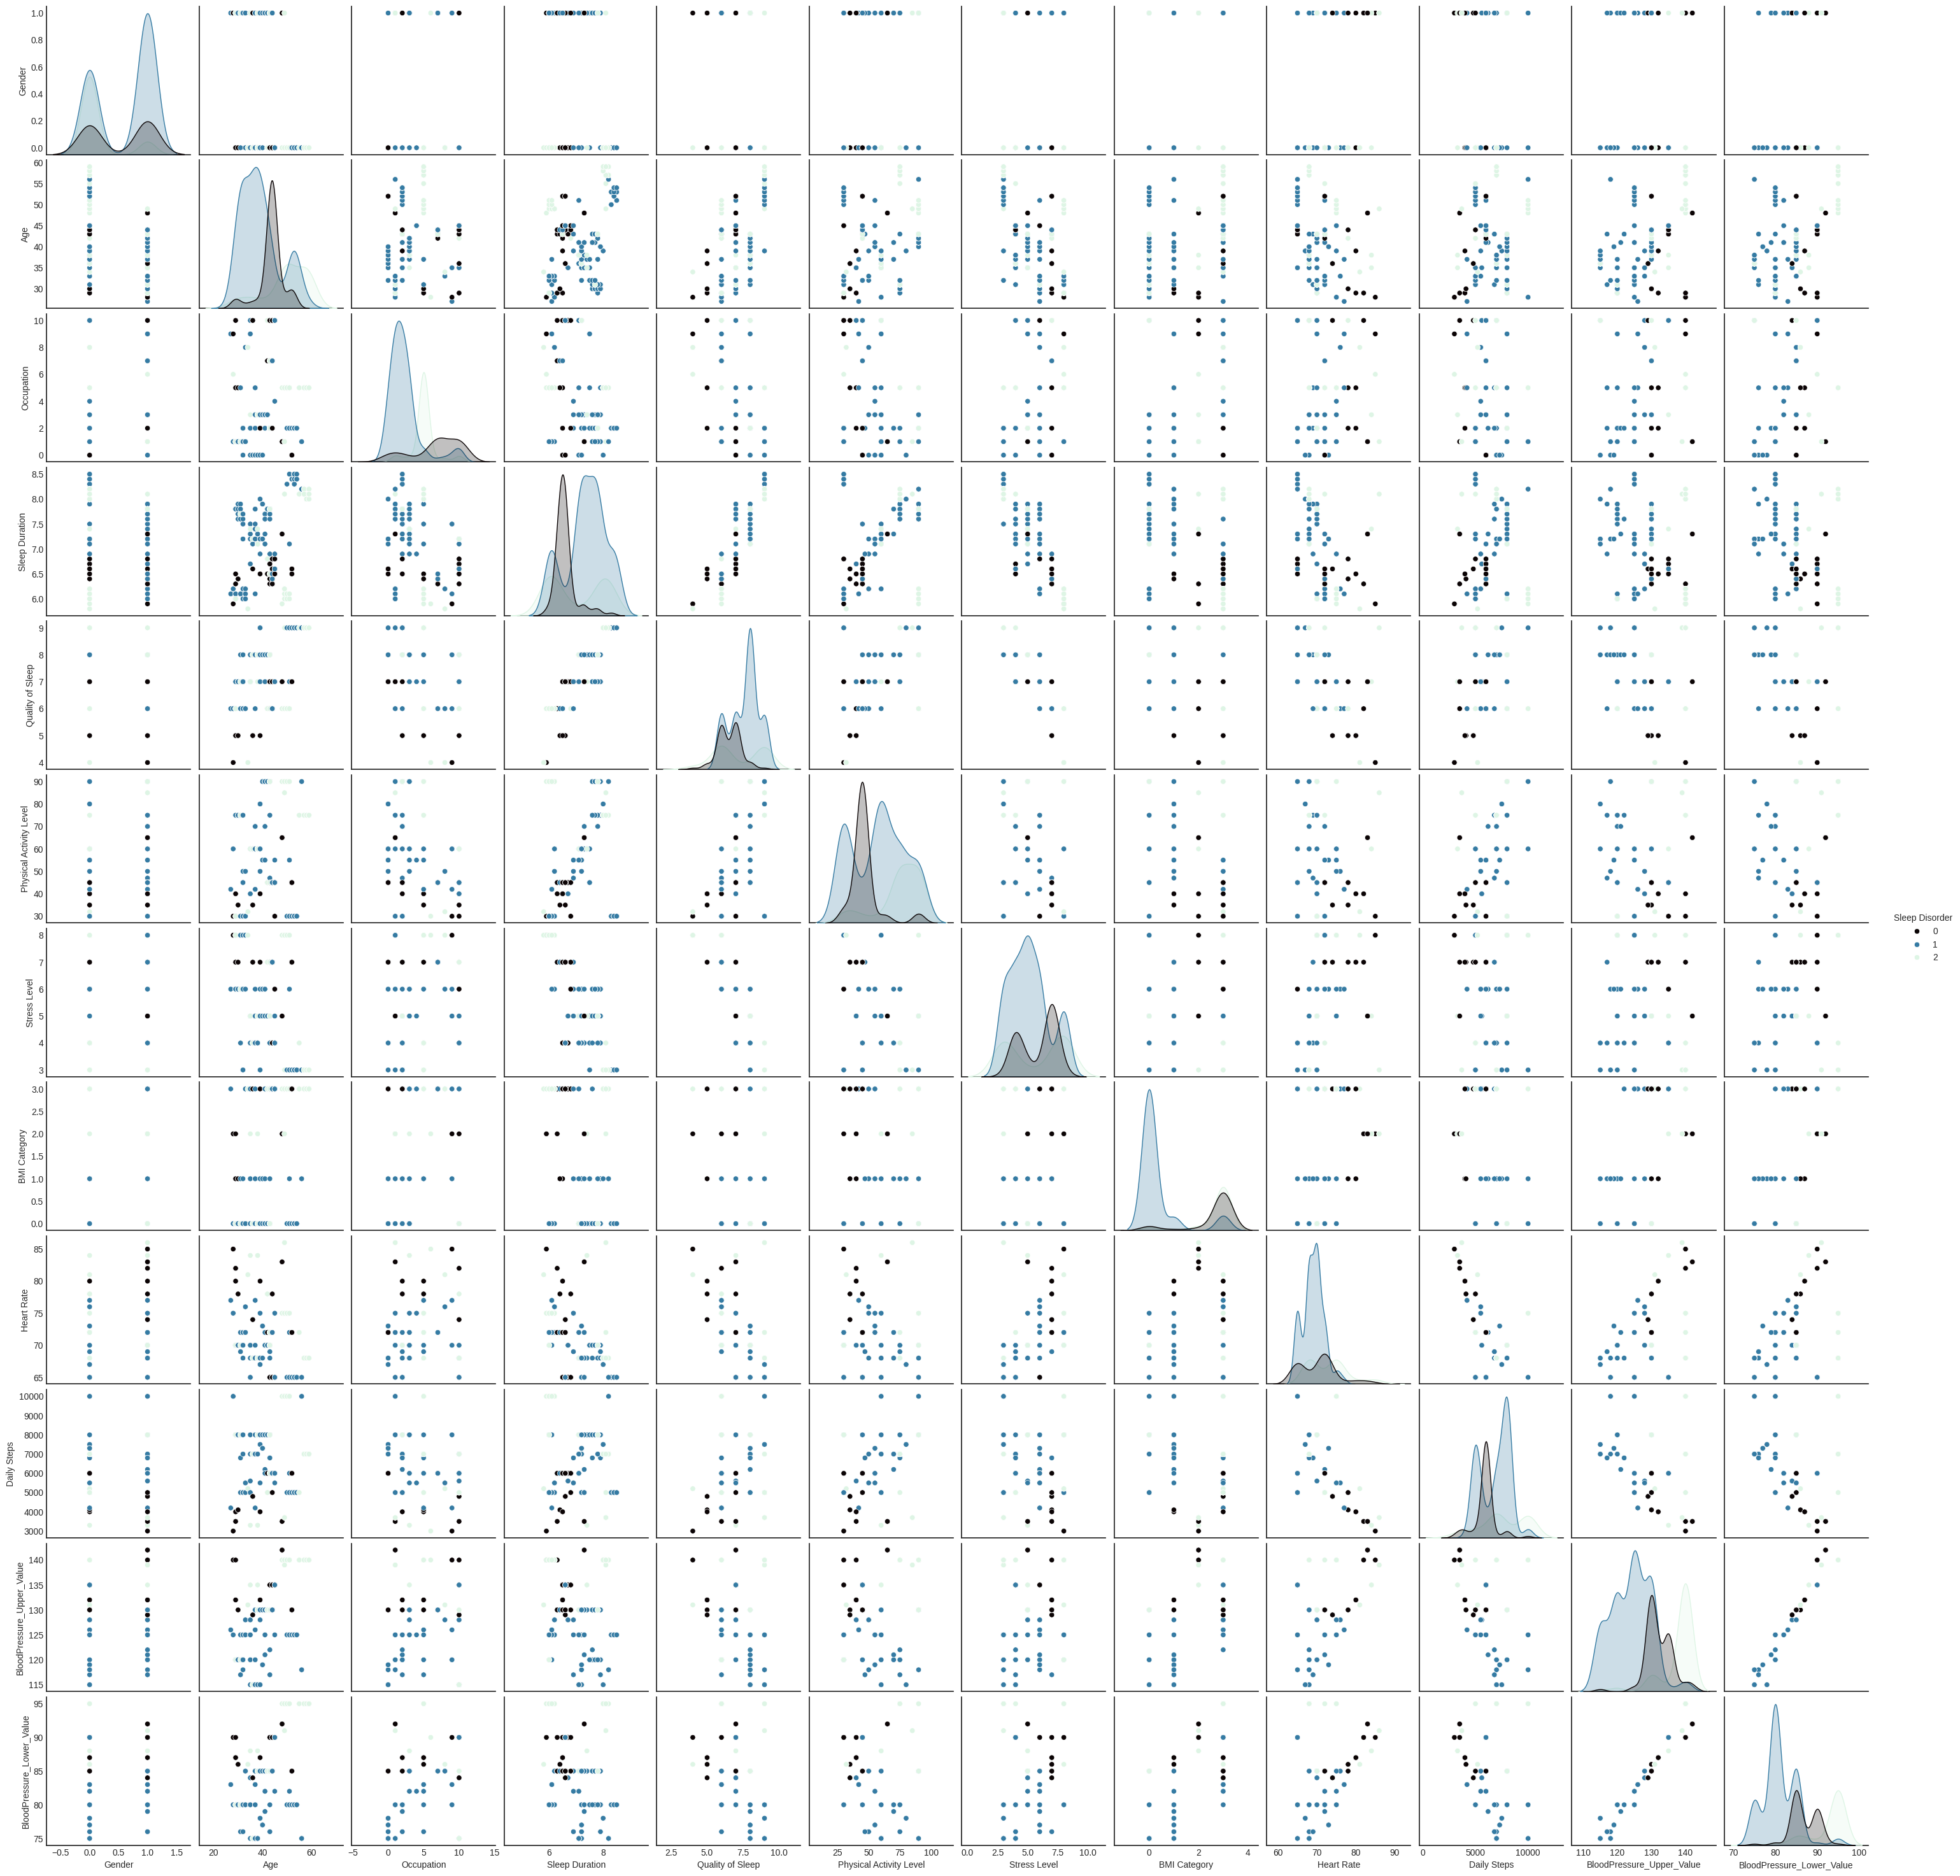

In [ ]:
plt.style.use('seaborn-v0_8-white')
sns.pairplot(data=df,hue='Sleep Disorder',palette='mako')
plt.legend()
plt.show()

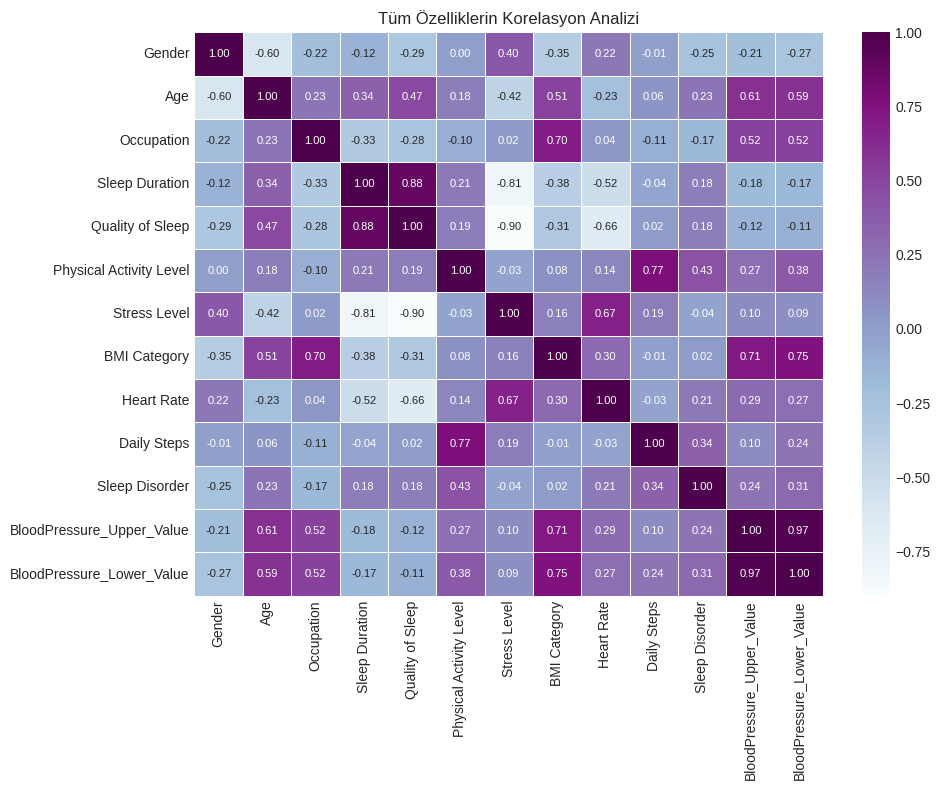

In [ ]:
correlation=df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", annot_kws={"size":8}, linewidths=0.5, cmap='BuPu')
plt.title('T√ºm √ñzelliklerin Korelasyon Analizi')
plt.tight_layout()
plt.show()

üîç √ñne √áƒ±kan Korelasyonlar:


*  üí° 1. Sleep Duration & Quality of Sleep: 0.88
√áok g√º√ßl√º bir pozitif korelasyon var.

Uyku s√ºresi arttƒ±k√ßa uyku kalitesi de artƒ±yor ‚Üí mantƒ±klƒ± ve beklenen bir ili≈üki.
*   üí° 2. Stress Level ile:
Sleep Duration: -0.81
Quality of Sleep: -0.90

Bu, stres arttƒ±k√ßa hem uyku s√ºresi hem de kalitenin d√º≈üt√ºƒü√ºn√º g√∂steriyor ‚Üí √ßok anlamlƒ± ve g√º√ßl√º negatif korelasyonlar.





*   üí° 3. BMI Category ile:
Blood Pressure Upper: 0.71
Blood Pressure Lower: 0.75

V√ºcut kitle indeksi arttƒ±k√ßa kan basƒ±ncƒ± da artƒ±yor ‚Üí fizyolojik a√ßƒ±dan anlamlƒ± bir sonu√ß.
*   üí° 4. Daily Steps & Physical Activity Level: 0.77
Bu da beklenen bir sonu√ß, fiziksel aktivite d√ºzeyi arttƒ±k√ßa atƒ±lan adƒ±m sayƒ±sƒ± da artƒ±yor.


# ‚úÇÔ∏è Veri B√∂lme(Data Spliting)

In [ ]:
X = df.drop(['Sleep Disorder'], axis=1)
y = df['Sleep Disorder']



*  üìå Baƒüƒ±msƒ±z (X) ve baƒüƒ±mlƒ± (y) deƒüi≈ükenlerin ayrƒ±lmasƒ±

*  üìå Hedef deƒüi≈üken "Sleep Disorder"







In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.30, random_state=0)

In [ ]:
print(len(X_train))
print(len(X_test))

261
113


# üîç SMOTE


*  üìù  SMOTE (Synthetic Minority Over-sampling Technique), dengesiz veri
k√ºmelerinde azƒ±nlƒ±k sƒ±nƒ±fƒ±nƒ± artƒ±rarak daha dengeli bir veri daƒüƒ±lƒ±mƒ± olu≈üturmayƒ± ama√ßlayan bir y√∂ntemdir.
*  üìù  SMOTE eƒüitim veri setine uygulanƒ±r,test setine uygulanmaz.






In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [ ]:
print(y_train.value_counts())  # SMOTE uygulamadan √∂nceki sƒ±nƒ±f daƒüƒ±lƒ±mƒ±
print(y_train_res.value_counts())  # SMOTE sonrasƒ± daƒüƒ±lƒ±m


Sleep Disorder
1    153
0     54
2     54
Name: count, dtype: int64
Sleep Disorder
1    153
0    153
2    153
Name: count, dtype: int64


In [ ]:
pip install lazypredict

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 29.0/29.0 MB 30.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6.3/6.3 MB 70.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 231.9/231.9 kB 15.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 147.8/147.8 kB 11.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 114.9/114.9 kB 9.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 85.0/85.0 kB 5.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

# üîç Lazy Predict

In [ ]:
from lazypredict.Supervised import LazyClassifier

lazy_model = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = lazy_model.fit(X_train, X_test, y_train, y_test)
print(models)

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 138
[LightGBM] [Info] Number of data points in the train set: 261, number of used features: 12
[LightGBM] [Info] Start training from score -1.575536
[LightGBM] [Info] Start training from score -0.534082
[LightGBM] [Info] Start training from score -1.575536
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# üîçHiperparametre Ayarƒ±


*  üöÄ Hiperparametre ayarƒ± (Hyperparameter Tuning), makine √∂ƒürenimi modellerinin performansƒ±nƒ± optimize etmek i√ßin kullanƒ±lan bir tekniktir. Hiperparametreler, modelin √∂ƒürenme s√ºrecinde deƒüi≈ümeyen, √∂nceden belirlenmi≈ü ayarlardƒ±r. Doƒüru hiperparametre se√ßimi, modelin doƒüruluƒüunu ve genelleme yeteneƒüini artƒ±rabilir.




In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier())
])
param_grid = [
    {
        'clf': [ExtraTreesClassifier()],
        'clf__n_estimators': [100, 200, 300],
        'clf__max_depth': [None, 5, 10],
    },
    {
        'clf': [XGBClassifier()],
        'clf__n_estimators': [100, 200, 300],
        'clf__learning_rate': [0.01, 0.1, 0.3],
    },
    {
        'clf': [RandomForestClassifier()],
        'clf__n_estimators': [100, 200, 300],
        'clf__max_depth': [None, 5, 10],
    },
    {
        'clf': [DecisionTreeClassifier()],
        'clf__max_depth': [None, 5, 10, 15],
    },
    {
        'clf': [SVC()],
        'clf__kernel': ['linear', 'rbf'],
        'clf__C': [0.01, 0.1, 1, 10],
    },
    {
        'clf': [LogisticRegression()],
        'clf__solver': ['liblinear', 'lbfgs'],
        'clf__C': [0.01, 0.1, 1, 10],
    }
]

In [ ]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

models = [
    ('Extra Trees', ExtraTreesClassifier()),
    ('XGBClassifier', XGBClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('SVC', SVC()),
    ('Logistic Regression', LogisticRegression())
]

accuracy_scores = []
for name, model in models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

fig = go.Figure(data=go.Bar(x=[name for name, _ in models], y=accuracy_scores))
fig.update_layout(title='Modellerin Kar≈üƒ±la≈ütƒ±rƒ±lmasƒ±',
                  xaxis=dict(title='Modeller'),
                  yaxis=dict(title='Doƒüruluk'))
fig.show()



*   ‚úÖ En iyi model




In [ ]:
print("En iyi model:", grid_search.best_estimator_)

En iyi model: Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_stra

In [ ]:
importance = best_model.named_steps['clf'].feature_importances_
feature_names = X.columns

sorted_indices = np.argsort(importance)[::-1]
sorted_importance = importance[sorted_indices]
sorted_features = feature_names[sorted_indices]

fig = go.Figure(data=go.Bar(x=sorted_features, y=sorted_importance))
fig.update_layout(title='√ñzellik √ñnem Grafiƒüi',
                  xaxis=dict(title='√ñzellikler'),
                  yaxis=dict(title='√ñnem'))
fig.show()

# üéØ XGBClassifier Modelinin Sonu√ßlarƒ±

Doƒüruluk: 0.8938053097345132
Sƒ±nƒ±flandƒ±rma Raporu:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81        23
           1       0.93      0.94      0.93        66
           2       0.91      0.83      0.87        24

    accuracy                           0.89       113
   macro avg       0.88      0.87      0.87       113
weighted avg       0.89      0.89      0.89       113



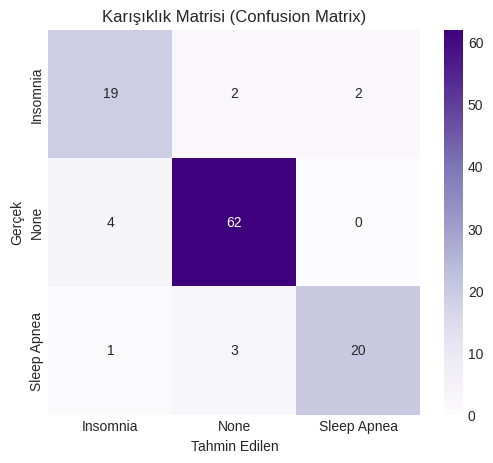

In [ ]:
best_params = grid_search.best_params_
{
    'clf': XGBClassifier(),
    'clf__n_estimators': 200,
    'clf__learning_rate': 0.1
}
from xgboost import XGBClassifier

xgb_best_params = {
    key.replace('clf__', ''): value
    for key, value in best_params.items()
    if key.startswith('clf__')
}

xgb_model = XGBClassifier(**xgb_best_params)

xgb_model.fit(X_train_res, y_train_res)

y_pred = xgb_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Doƒüruluk:", accuracy_score(y_test, y_pred))

print("Sƒ±nƒ±flandƒ±rma Raporu:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
class_names = ['Insomnia', 'None', 'Sleep Apnea']
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Ger√ßek')
plt.title('Karƒ±≈üƒ±klƒ±k Matrisi (Confusion Matrix)')
plt.show()


# Cross Validation


*   üìå√áapraz doƒürulama (Cross-validation), makine √∂ƒürenimi modellerinin genelle≈ütirme performansƒ±nƒ± deƒüerlendirmek i√ßin kullanƒ±lan bir tekniktir. Modelin farklƒ± veri alt k√ºmeleri √ºzerinde nasƒ±l √ßalƒ±≈ütƒ±ƒüƒ±nƒ± g√∂rmek i√ßin veri seti eƒüitim ve test b√∂l√ºmlerine ayrƒ±lƒ±r ve bu i≈ülem birden fazla kez tekrarlanƒ±r.
*   üìåStratified K-Fold: Veri seti sƒ±nƒ±f daƒüƒ±lƒ±mƒ±nƒ± koruyarak b√∂l√ºn√ºr, √∂zellikle dengesiz veri k√ºmelerinde faydalƒ±dƒ±r.


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(xgb_model, X_train_res, y_train_res, cv=cv, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))


Cross-Validation Scores: [0.91304348 0.92391304 0.93478261 0.88043478 0.86813187]
Mean Accuracy: 0.9040611562350694
Standard Deviation: 0.025564453648436368


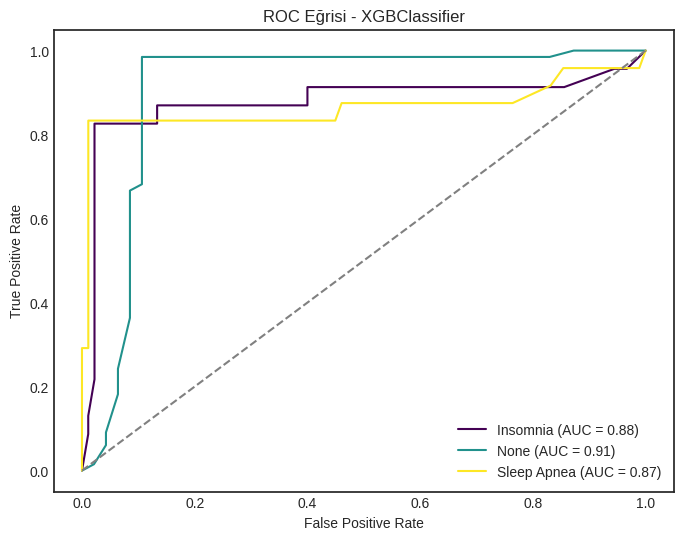

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

y_test_probs = xgb_model.predict_proba(X_test)
plt.figure(figsize=(8,6))
unique_classes = sorted(set(y_test))
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_classes)))

for idx, cls in enumerate(unique_classes):
    fpr, tpr, _ = roc_curve(y_test, y_test_probs[:, idx], pos_label=cls)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[idx], label=f"{class_names[idx]} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], linestyle="--", color="gray")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Eƒürisi - XGBClassifier")
plt.legend()
plt.show()


# A√ßƒ±klamalƒ± Yapay Zeka



*  SHAP (Shapley Additive Explanations): Her √∂zelliƒüin model tahminine olan katkƒ±sƒ±nƒ± hesaplar.
*  LIME (Local Interpretable Model-Agnostic Explanations): Modelin belirli bir tahmin i√ßin nasƒ±l karar verdiƒüini anlamak i√ßin yerel a√ßƒ±klamalar sunar.



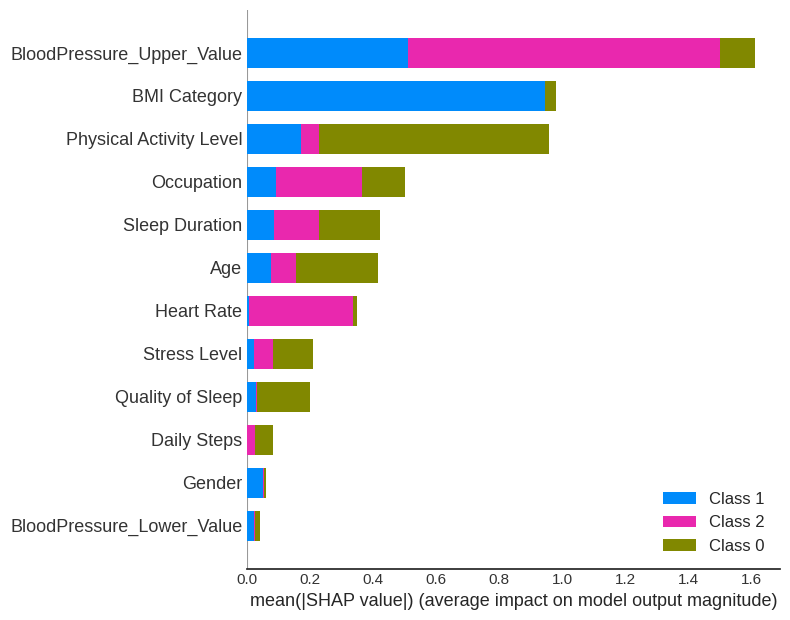

In [ ]:
import shap
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)


In [ ]:
pip install lime


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 275.7/275.7 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=5f9c375b7155df0e8fb817225906770a201b446adadb0430b9e52a3fba833546
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X_train_res.values, feature_names=X.columns, class_names=["Insomnia", "None", "Sleep Apnea"], mode="classification")

exp = explainer.explain_instance(X_test.iloc[0].values, xgb_model.predict_proba)
exp.show_in_notebook()
